#**Medical Insurance Cost**

##Problem Statement:-

*   Predict healthcare costs for patients based on demographic, lifestyle, health status, insurance, family history, proximity to healthcare facilities, and primary care utilization.

##Expected Outcome:-

*   Predictive model for estimating medical costs and actionable insights to optimize resource allocation and enhance healthcare services at Hospital ABC.



##Download Dataset:-

In [ ]:
!wget "https://docs.google.com/spreadsheets/d/1ac28k9wcw4h5PeQcR751tL_FlJ-gWWU3WFlZlWWPCRY/export?format=csv" -O medical_insurance.csv

--2024-04-15 15:10:39--  https://docs.google.com/spreadsheets/d/1ac28k9wcw4h5PeQcR751tL_FlJ-gWWU3WFlZlWWPCRY/export?format=csv
Resolving docs.google.com (docs.google.com)... 172.217.7.46, 2607:f8b0:4025:811::200e
Connecting to docs.google.com (docs.google.com)|172.217.7.46|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0c-4o-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/q71ap9m0ghvaocfd4hilhuk3ok/1713193835000/118206590694427686292/*/1ac28k9wcw4h5PeQcR751tL_FlJ-gWWU3WFlZlWWPCRY?format=csv [following]
--2024-04-15 15:10:39--  https://doc-0c-4o-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/q71ap9m0ghvaocfd4hilhuk3ok/1713193835000/118206590694427686292/*/1ac28k9wcw4h5PeQcR751tL_FlJ-gWWU3WFlZlWWPCRY?format=csv
Resolving doc-0c-4o-sheets.googleusercontent.com (doc-0c-4o-sheets.googleusercontent.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to doc-0c-4o-sheets.googleusercontent.com (doc-0c-

#Step 1:- Data Preprocessing




In [ ]:
# Import Basic Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# Import the data

d=pd.read_csv("medical_insurance.csv")
d

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,62,M,23.39610,4,Yes,East,White Collar,Rarely,Heart Disease,HMO,...,Easy,High,NaN,NaN,NaN,Other,NaN,1.0,18.0,7604.947
1,65,M,22.03668,4,Yes,North,Retired,2 times/week,Heart Disease,HDHP,...,Easy,Low,Moderate,Yes,Moderate,Asthma,NaN,0.0,1.0,7067.338
2,71,M,23.03985,1,No,North,Retired,Rarely,NaN,HMO,...,Moderate,High,NaN,NaN,Moderate,Obesity,Yes,2.0,15.0,4478.128
3,18,F,24.82284,0,Yes,North,Self Employed,Daily,Arthritis,PPO,...,NaN,NaN,NaN,NaN,High,Cancer,No,3.0,9.0,12944.880
4,21,M,23.44420,1,No,North,Professional,Daily,Arthritis,HDHP,...,Easy,Low,NaN,Yes,Moderate,Other,NaN,0.0,17.0,8275.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75,M,24.18366,3,No,West,Blue Collar,Daily,NaN,PPO,...,Easy,Moderate,Low,No,High,Hypertension,NaN,4.0,16.0,7344.957
996,24,F,36.91005,0,No,East,Student,3 times/week,Arthritis,HDHP,...,NaN,NaN,Low,Yes,High,Obesity,Yes,4.0,1.0,13072.180
997,37,M,25.34770,4,Yes,North,Blue Collar,3 times/week,High Blood Pressure,HMO,...,Moderate,Low,Low,NaN,Low,Hypertension,NaN,1.0,13.0,10463.350
998,52,F,26.18630,1,No,West,Retired,Once a week,High Blood Pressure,HMO,...,Moderate,Low,Moderate,Yes,High,Asthma,Yes,3.0,14.0,7296.749


*Insights*

*   The Dataset contains 1000 rows and 35 columns.
*   Individual's ages range from 18 to 75.
*   The BMI values in the dataset range from 18.5 to 36.91
*   A significant portion of individuals seem to be smokers.
*   Common chronic conditions include heart disease, arthritis, and high blood
    pressure.
*   Two primary types Insurance Plans: HMO (Health Maintenance Organization)  
and HDHP (High Deductible Health Plan).
*   Exercise habits vary from daily to rarely.It indicates how often            individuals engage in physical activity
*   Occupations include white-collar, retired, student, and blue-collar workers.
*   Emergency room visits range from 0 to 4 times.
*   Healthcare charges span from approximately 4,478 to 13,072.
*   Access to healthcare, social support, and genetics impact health.
*   Health literacy affects decision-making.









In [ ]:
d.shape

(1000, 35)

*Insights*

*   The shape of the dataset is (1000,35)



In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1000 non-null   int64  
 1   Sex                            1000 non-null   object 
 2   BMI                            984 non-null    float64
 3   Children                       1000 non-null   int64  
 4   Smoker                         999 non-null    object 
 5   Region                         999 non-null    object 
 6   Occupation                     1000 non-null   object 
 7   Exercise_Frequency             1000 non-null   object 
 8   Chronic_Conditions             796 non-null    object 
 9   Insurance_Plan_Type            1000 non-null   object 
 10  Marital_Status                 1000 non-null   object 
 11  Distance_to_Nearest_Hospital   994 non-null    float64
 12  Income_Level                   1000 non-null   ob

*Insights*

*   The dataset contains both numerical (integer and float) and categorical (object) data types.
*   Some of the attributes have missing values.



In [ ]:
d.duplicated().sum()

0


*   There is no duplcate values



In [ ]:
d.head()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,62,M,23.39610,4,Yes,East,White Collar,Rarely,Heart Disease,HMO,...,Easy,High,NaN,NaN,NaN,Other,NaN,1.0,18.0,7604.947
1,65,M,22.03668,4,Yes,North,Retired,2 times/week,Heart Disease,HDHP,...,Easy,Low,Moderate,Yes,Moderate,Asthma,NaN,0.0,1.0,7067.338
2,71,M,23.03985,1,No,North,Retired,Rarely,NaN,HMO,...,Moderate,High,NaN,NaN,Moderate,Obesity,Yes,2.0,15.0,4478.128
3,18,F,24.82284,0,Yes,North,Self Employed,Daily,Arthritis,PPO,...,NaN,NaN,NaN,NaN,High,Cancer,No,3.0,9.0,12944.880
4,21,M,23.44420,1,No,North,Professional,Daily,Arthritis,HDHP,...,Easy,Low,NaN,Yes,Moderate,Other,NaN,0.0,17.0,8275.411



*   This command is typically used to display the first few rows of a DataFrame named d.



In [ ]:
d.tail()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
995,75,M,24.18366,3,No,West,Blue Collar,Daily,NaN,PPO,...,Easy,Moderate,Low,No,High,Hypertension,NaN,4.0,16.0,7344.957
996,24,F,36.91005,0,No,East,Student,3 times/week,Arthritis,HDHP,...,NaN,NaN,Low,Yes,High,Obesity,Yes,4.0,1.0,13072.180
997,37,M,25.34770,4,Yes,North,Blue Collar,3 times/week,High Blood Pressure,HMO,...,Moderate,Low,Low,NaN,Low,Hypertension,NaN,1.0,13.0,10463.350
998,52,F,26.18630,1,No,West,Retired,Once a week,High Blood Pressure,HMO,...,Moderate,Low,Moderate,Yes,High,Asthma,Yes,3.0,14.0,7296.749
999,68,M,31.11520,1,Yes,West,Blue Collar,Rarely,Arthritis,HDHP,...,NaN,Low,Moderate,No,Moderate,Obesity,Yes,0.0,5.0,7710.789



*   The command d.tail() is used to display the last few rows of a DataFrame named d.




In [ ]:
d.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Occupation',
       'Exercise_Frequency', 'Chronic_Conditions', 'Insurance_Plan_Type',
       'Marital_Status', 'Distance_to_Nearest_Hospital', 'Income_Level',
       'Family_Medical_History', 'Primary_Care_Physician_Visits',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine',
       'Emergency_Room_Visits', 'Healthcare_Utilization', 'Charges'],
      dtype='object')


*  The command 'd.columns' is used to retrieve the column labels of a DataFrame d.




In [ ]:
d.describe()

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges
count,1000.000000,984.000000,1000.000000,994.000000,1000.000000,993.000000,994.000000,1000.000000
mean,48.167000,25.096119,1.918000,10.623046,4.964000,2.028197,10.151911,10149.250960
std,18.009427,4.929889,1.428747,5.449890,2.599897,1.414645,5.449028,3006.201159
min,18.000000,8.889366,0.000000,1.000381,1.000000,0.000000,1.000000,1910.048000
25%,33.000000,21.891128,1.000000,5.893609,3.000000,1.000000,6.000000,8193.242000
50%,48.000000,25.270985,2.000000,10.953870,5.000000,2.000000,10.000000,10228.765000
75%,64.000000,28.176527,3.000000,15.288303,7.000000,3.000000,15.000000,12157.125000
max,79.000000,39.558080,4.000000,19.996930,9.000000,4.000000,19.000000,19139.980000


*Insights*

*  The d.describe() function provides descriptive statistics of the DataFrame d.
*  The average age of patients is approximately 48 years, with a range from 18 to 79 years.
*  The average BMI (Body Mass Index) is around 25, indicating that the patient population, on average, falls within the "normal weight" range.
*  The average healthcare charges incurred by patients is approximately $10,149,  with a range from  $1,910 to $19,140.
*  The average distance to the nearest hospital is approximately 10.6 units, with a range from 1 to 20 units.


##Finding The Correlation Between The Columns:-

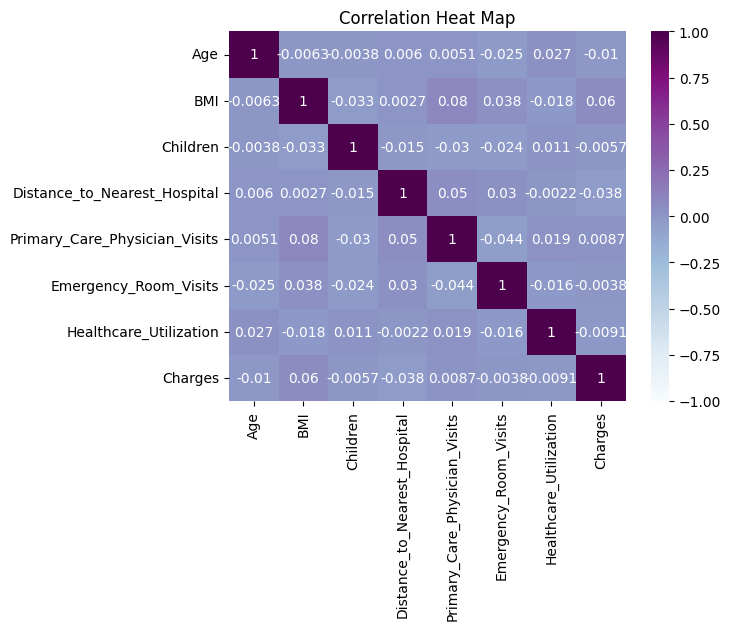

<Figure size 1500x1500 with 0 Axes>

In [ ]:
numeric_df = d.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap="BuPu")
plt.title(f'Correlation Heat Map')
plt.figure(figsize=(15, 15))
plt.show()

*Insights*

*  A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set
*   The correlation matrix above indicates that Charges has a relationship with both BMI and Primary Care Physician Visits.


##Detection Of Missing Values:-

In [ ]:
d.isnull().sum()

Age                                0
Sex                                0
BMI                               16
Children                           0
Smoker                             1
Region                             1
Occupation                         0
Exercise_Frequency                 0
Chronic_Conditions               204
Insurance_Plan_Type                0
Marital_Status                     0
Distance_to_Nearest_Hospital       6
Income_Level                       0
Family_Medical_History             0
Primary_Care_Physician_Visits      0
Mental_Health_Status               0
Prescription_Medication_Usage      0
Employment_Status                252
Education_Level                  198
Dietary_Habits                   241
Alcohol_Consumption              240
Sleep_Quality                    214
Stress_Level                     245
Medication_Adherence             311
Physical_Activity                254
Access_to_Healthcare             264
Social_Support                   230
E

*Insights*

*   Attributes like Age,Sex,Children,Occupation,Charges,Smoker,Exercise Frequecy etc having no missing values
*  Attributes like Employment_Status,Education_Level,Sleep_Quality,Stress_Level,Medication_Adherence etc having more missing values



##Removal of Unwanted Coulmns:-

In [ ]:
# Remove unwanted columns

d=d.drop(['Employment_Status','Education_Level','Medication_Adherence','Social_Support','Environmental_Factors','Genetic_Predisposition','Access_to_Telemedicine','Emergency_Room_Visits'], axis=1)


In [ ]:
# Remove unwanted columns

d=d.drop(['Occupation','Marital_Status','Prescription_Medication_Usage','Dietary_Habits','Alcohol_Consumption','Sleep_Quality','Stress_Level','Physical_Activity','Access_to_Healthcare','Health_Literacy_Level','Comorbidities'], axis=1)

*Insights*

*   The drop() function is used to remove rows or columns from a DataFrame
*   The columns specified in the list will be dropped.
*   The axis=1 parameter indicates that we're dropping columns.


##Handling missing values:-

In [ ]:
# Handling missing values

d['Healthcare_Utilization'].fillna(d['Healthcare_Utilization'].mean(), inplace=True)
d['BMI'].fillna(d['BMI'].mean(), inplace=True)
d['Smoker'].fillna(d['Smoker'].mode()[0], inplace=True)
d['Region'].fillna(method='ffill', inplace=True)
d['Chronic_Conditions'].fillna(d['Chronic_Conditions'].mode()[0], inplace=True)
d['Distance_to_Nearest_Hospital'].fillna(d['Distance_to_Nearest_Hospital'].mean(), inplace=True)

*Insights*

*   Fills missing values in the 'Healthcare_Utilization' column with the mean of non-missing values using .fillna() method.
*   Fills missing values in the 'BMI' column with the mean of non-missing values using .fillna() method.
*   Fills missing values in the 'Smoker' column with the most frequent value (mode) using .fillna() method.
*   Fills missing values in the 'Region' column with the the most frequent value (mode) using .fillna() method.
*   Fills missing values in the 'Chronic_Conditions' column with the most frequent value (mode) using .fillna() method.
*  Fills missing values in the 'Distance_to_Nearest_Hospital' column with the mean of non-missing values using .fillna() method.  


In [ ]:
d.isnull().sum()

Age                              0
Sex                              0
BMI                              0
Children                         0
Smoker                           0
Region                           0
Exercise_Frequency               0
Chronic_Conditions               0
Insurance_Plan_Type              0
Distance_to_Nearest_Hospital     0
Income_Level                     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Mental_Health_Status             0
Healthcare_Utilization           0
Charges                          0
dtype: int64


*   After handling missing values, by checking null values we found that there is no null values in the data frame.

##Label Encoding:-

In [ ]:
# Encode the categorical values into numerical using Label Encoder

print("Sex before encoding:", d['Sex'].unique())
print("Smoker column before encoding:", d['Smoker'].unique())
print("Region column before encoding:", d['Region'].unique())
print("Exercise_Frequency column before encoding:", d['Exercise_Frequency'].unique())
print("Chronic_Conditions column before encoding:", d['Chronic_Conditions'].unique())
print("Insurance_Plan_Type column before encoding:", d['Insurance_Plan_Type'].unique())
print("Income_Level column before encoding:", d['Income_Level'].unique())
print("Family_Medical_History column before encoding:", d['Family_Medical_History'].unique())
print("Mental_Health_Status column before encoding:", d['Mental_Health_Status'].unique())


label_encoder = LabelEncoder()
d['sex'] = label_encoder.fit_transform(d['Sex'])
d['smoker'] = label_encoder.fit_transform(d['Smoker'])
d['region'] = label_encoder.fit_transform(d['Region'])
d['exercise_Frequency'] = label_encoder.fit_transform(d['Exercise_Frequency'])
d['chronic_Conditions'] = label_encoder.fit_transform(d['Chronic_Conditions'])
d['insurance_Plan_Type'] = label_encoder.fit_transform(d['Insurance_Plan_Type'])
d['income_Level'] = label_encoder.fit_transform(d['Income_Level'])
d['family_Medical_History'] = label_encoder.fit_transform(d['Family_Medical_History'])
d['mental_Health_Status'] = label_encoder.fit_transform(d['Mental_Health_Status'])

print("\n After Encoding\n")
print("Sex column after encoding:", d['sex'].unique())
print("Smoker column after encoding:", d['smoker'].unique())
print("Region column after encoding:", d['region'].unique())
print("Exercise_Frequency  column after encoding:", d['exercise_Frequency'].unique())
print("Chronic_Conditions column after encoding:", d['chronic_Conditions'].unique())
print("Insurance_Plan_Type column after encoding:", d['insurance_Plan_Type'].unique())
print("Income_Level column after encoding:", d['income_Level'].unique())
print("Family_Medical_History column after encoding:", d['family_Medical_History'].unique())
print("Mental_Health_Status column after encoding:", d['mental_Health_Status'].unique())

Sex before encoding: ['M' 'F']
Smoker column before encoding: ['Yes' 'No']
Region column before encoding: ['East' 'North' 'South' 'West']
Exercise_Frequency column before encoding: ['Rarely' '2 times/week' 'Daily' '3 times/week' 'Once a week']
Chronic_Conditions column before encoding: ['Heart Disease' 'Arthritis' 'High Blood Pressure' 'Diabetes']
Insurance_Plan_Type column before encoding: ['HMO' 'HDHP' 'PPO']
Income_Level column before encoding: ['Low' 'High' 'Medium']
Family_Medical_History column before encoding: ['Yes' 'No']
Mental_Health_Status column before encoding: ['Poor' 'Good' 'Excellent' 'Fair']

 After Encoding

Sex column after encoding: [1 0]
Smoker column after encoding: [1 0]
Region column after encoding: [0 1 2 3]
Exercise_Frequency  column after encoding: [4 0 2 1 3]
Chronic_Conditions column after encoding: [2 0 3 1]
Insurance_Plan_Type column after encoding: [1 0 2]
Income_Level column after encoding: [1 0 2]
Family_Medical_History column after encoding: [1 0]
Men

*Insights*

*   This code snippet encode the entire columns of the data frame 'd'using Label Encoder()
*   This encoder assigns a unique integer to each category of the columns.


In [ ]:
d=d.drop(['Sex','Smoker','Region','Exercise_Frequency','Chronic_Conditions','Insurance_Plan_Type','Income_Level','Family_Medical_History','Mental_Health_Status'],axis=1)


*   The columns specified in the list will be dropped, beacuse the data frame 'd' contains 2 columns for each category.

##Calculation Of Skewness:-

In [ ]:
print("Skewness of each colmn:\n")
for i in d.columns:
    skewness = skew(d[i])
    if skewness > 0.5:
        sktype=" positively skewed"
    elif skewness < -0.5:
        sktype="Negatively skewed"
    else:
        sktype="Approximately symmetric"
    print(f"{i}: {skewness} - {sktype}")

Skewness of each colmn:

Age: -0.007941013053278939 - Approximately symmetric
BMI: -0.09609327711303361 - Approximately symmetric
Children: 0.10721050394637341 - Approximately symmetric
Distance_to_Nearest_Hospital: -0.06368075853344955 - Approximately symmetric
Primary_Care_Physician_Visits: -0.007674079107143781 - Approximately symmetric
Healthcare_Utilization: -0.03889778000079297 - Approximately symmetric
Charges: -0.058190640764644544 - Approximately symmetric
sex: 0.05602196491621486 - Approximately symmetric
smoker: -0.04401065186678368 - Approximately symmetric
region: -0.0518541206525142 - Approximately symmetric
exercise_Frequency: 0.05612034978513492 - Approximately symmetric
chronic_Conditions: -0.29233988030853386 - Approximately symmetric
insurance_Plan_Type: -0.0018534215861239292 - Approximately symmetric
income_Level: 0.031048748790369625 - Approximately symmetric
family_Medical_History: -0.02400172818664648 - Approximately symmetric
mental_Health_Status: -0.0485798330


*  The code iterates over the columns of a DataFrame.
*  Calculates the skewness of each column, determines the type of skewness
*  Prints the results indicating the skewness characteristics of each column in the DataFrame.

##Outlier Detection and Removal:-

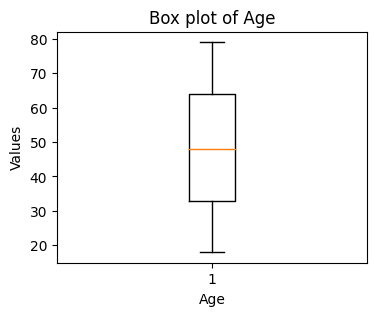

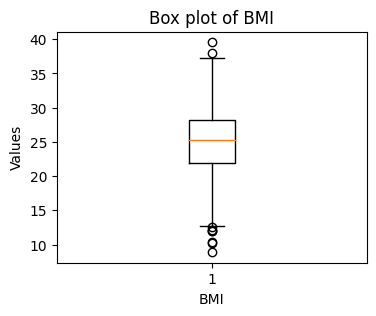

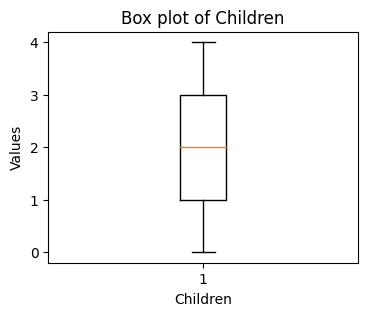

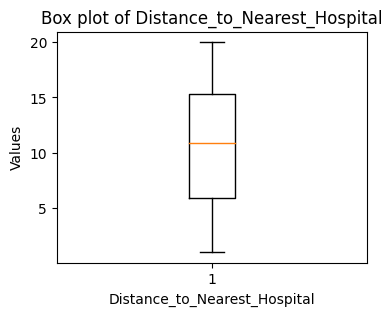

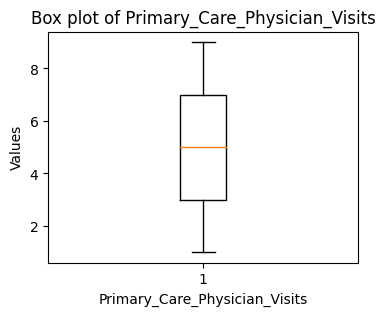

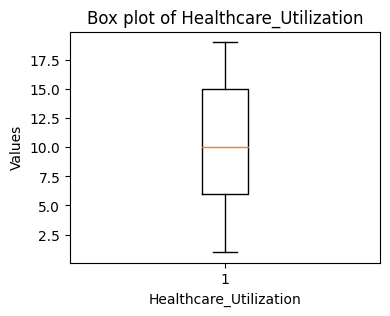

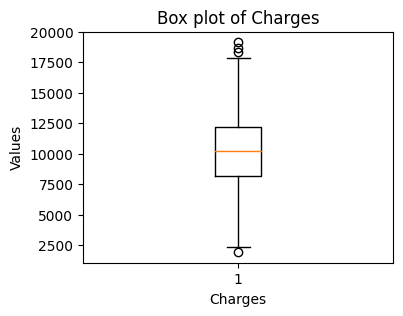

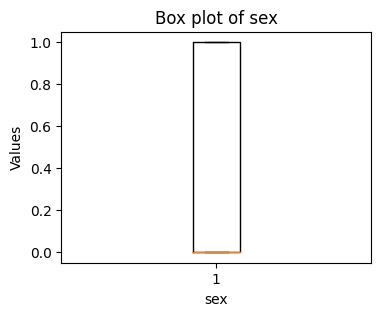

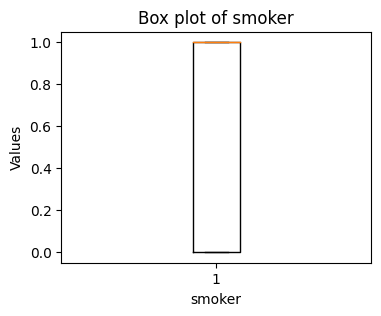

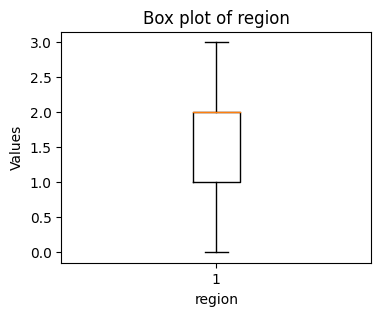

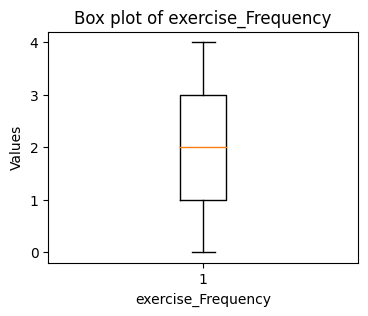

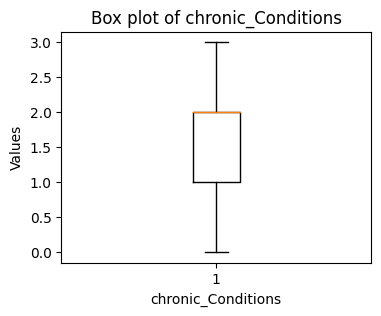

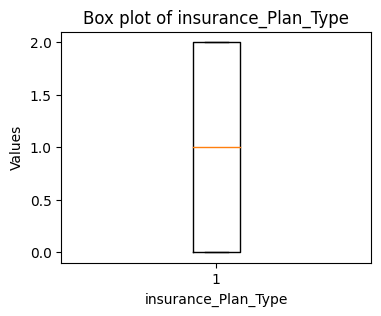

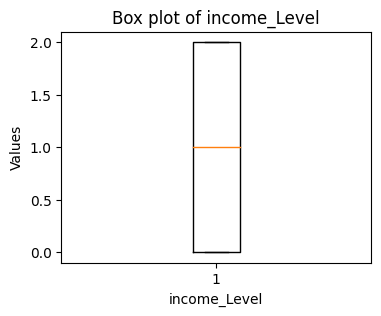

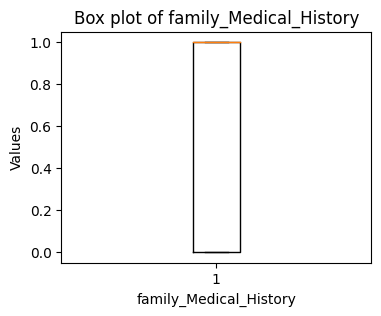

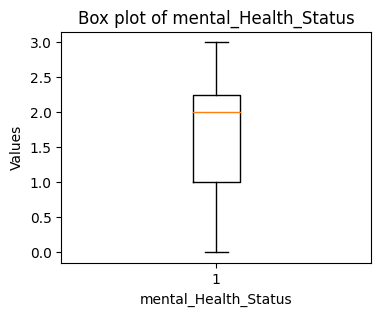

In [ ]:
for column in d.columns:
    plt.figure(figsize=(4,3))
    plt.title(f'Box plot of {column}')
    plt.boxplot(d[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()


*   After creating boxplots of the numerical colums, BMI and Charges containing some outliers .




**Handling the outlier of BMI**

In [ ]:
Q1=d['BMI'].quantile(0.25)
Q2=d['BMI'].quantile(0.5)
Q3=d['BMI'].quantile(0.75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul= Q3+1.5*IQR


*   This code calculates the lower and upper bounds for outliers detection using the Interquartile Range (IQR) method for the 'BMI' column in the DataFrame d.




In [ ]:
d[d['BMI']>ul]

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Healthcare_Utilization,Charges,sex,smoker,region,exercise_Frequency,chronic_Conditions,insurance_Plan_Type,income_Level,family_Medical_History,mental_Health_Status
201,58,38.00440,0,11.00301,7,7.0,10706.87,1,0,2,4,2,2,0,1,2
408,59,39.55808,4,10.37859,4,19.0,10753.11,1,1,1,3,2,0,1,1,3



*    It selects rows where the value in the 'BMI' column is greater than the upper bound ul.
*   This effectively identifies potential outliers in the 'BMI' column according to the Interquartile Range (IQR) method.


In [ ]:
d[d['BMI']>ll]

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Healthcare_Utilization,Charges,sex,smoker,region,exercise_Frequency,chronic_Conditions,insurance_Plan_Type,income_Level,family_Medical_History,mental_Health_Status
0,62,23.39610,4,5.112872,9,18.0,7604.947,1,1,0,4,2,1,1,1,3
1,65,22.03668,4,19.006750,3,1.0,7067.338,1,1,1,0,2,0,0,0,3
2,71,23.03985,1,9.624294,9,15.0,4478.128,1,0,1,4,2,1,2,1,3
3,18,24.82284,0,11.869340,7,9.0,12944.880,0,1,1,2,0,2,2,1,3
4,21,23.44420,1,15.146110,6,17.0,8275.411,1,0,1,2,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75,24.18366,3,5.041508,1,16.0,7344.957,1,0,3,2,2,2,1,0,2
996,24,36.91005,0,11.672830,1,1.0,13072.180,0,0,0,1,0,0,2,1,3
997,37,25.34770,4,15.267760,9,13.0,10463.350,1,1,1,1,3,1,1,0,2
998,52,26.18630,1,11.871490,8,14.0,7296.749,0,0,3,3,3,1,2,0,2



*   This line of code filters the DataFrame d based on the condition d['BMI'] > ll, selecting rows where the value in the 'BMI' column is greater than the lower bound ll.
*   This effectively identifies potential outliers in the 'BMI' column according to the Interquartile Range (IQR) method.



In [ ]:
# Removing outliers using Capping
df=d.copy()
df['BMI']=np.where(df['BMI']>ul,ul,np.where(df['BMI']<ll,ll,df['BMI']))



*   This line modifies the 'BMI' column of the DataFrame d.
*   If a value in the 'BMI' column is greater than the upper bound ul, it is replaced with ul.
*  If a value in the 'BMI' column is less than the lower bound ll, it is replaced with ll.
*  If neither of the above conditions is met, the original value is retained.







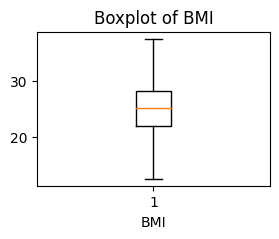

In [ ]:
# After handling outliers

plt.figure(figsize=(3, 2))
plt.boxplot(df['BMI'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()


*   After handing outlers in the BMI column, the box plot shows that there is no more outliers.



**Handling the outlier of Charges**

In [ ]:
Q1=d['Charges'].quantile(0.25)
Q2=d['Charges'].quantile(0.5)
Q3=d['Charges'].quantile(0.75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul= Q3+1.5*IQR


*   This code calculates the lower and upper bounds for outliers detection using the Interquartile Range (IQR) method for the 'Charges' column in the DataFrame d.

In [ ]:
d[d['Charges']>ul]

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Healthcare_Utilization,Charges,sex,smoker,region,exercise_Frequency,chronic_Conditions,insurance_Plan_Type,income_Level,family_Medical_History,mental_Health_Status
299,43,25.61344,1,11.096430,4,2.0,18334.81,0,1,1,4,2,2,2,0,1
310,27,24.69395,2,12.022860,2,13.0,18664.49,0,0,2,4,0,2,2,1,2
317,68,20.01403,0,1.810634,7,5.0,19139.98,1,0,0,0,2,1,2,0,3



*   It selects rows where the value in the 'Charges' column is greater than the upper bound ul.




In [ ]:
d[d['Charges']>ll]

,Age,BMI,Children,Distance_to_Nearest_Hospital,Primary_Care_Physician_Visits,Healthcare_Utilization,Charges,sex,smoker,region,exercise_Frequency,chronic_Conditions,insurance_Plan_Type,income_Level,family_Medical_History,mental_Health_Status
0,62,23.39610,4,5.112872,9,18.0,7604.947,1,1,0,4,2,1,1,1,3
1,65,22.03668,4,19.006750,3,1.0,7067.338,1,1,1,0,2,0,0,0,3
2,71,23.03985,1,9.624294,9,15.0,4478.128,1,0,1,4,2,1,2,1,3
3,18,24.82284,0,11.869340,7,9.0,12944.880,0,1,1,2,0,2,2,1,3
4,21,23.44420,1,15.146110,6,17.0,8275.411,1,0,1,2,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,75,24.18366,3,5.041508,1,16.0,7344.957,1,0,3,2,2,2,1,0,2
996,24,36.91005,0,11.672830,1,1.0,13072.180,0,0,0,1,0,0,2,1,3
997,37,25.34770,4,15.267760,9,13.0,10463.350,1,1,1,1,3,1,1,0,2
998,52,26.18630,1,11.871490,8,14.0,7296.749,0,0,3,3,3,1,2,0,2



*   This line of code filters the DataFrame d based on the condition d['Charges'] > ll, selecting rows where the value in the 'BMI' column is greater than the lower bound ll.




In [ ]:
# Removing outliers using Capping
df=d.copy()
df['Charges']=np.where(df['Charges']>ul,ul,np.where(df['Charges']<ll,ll,df['Charges']))


*  This line modifies the 'charges' column of the DataFrame d.
*  If a value in the 'charges' column is greater than the upper bound ul, it is replaced with ul.
* If a value in the 'Charges' column is less than the lower bound ll, it is replaced with ll.
* If neither of the above conditions is met, the original value is retained.  









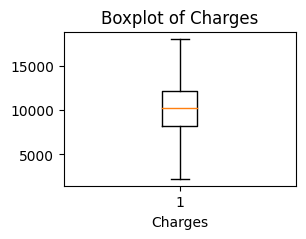

In [ ]:
# After handling outliers

plt.figure(figsize=(3, 2))
plt.boxplot(df['Charges'])
plt.title('Boxplot of Charges')
plt.xlabel('Charges')
plt.show()



*   After handing outlers in the Charges column, the box plot shows that there is no more outliers.

In [ ]:
df.shape

(1000, 16)

##**Our dataset will be fine-tuned and cleansed during data preprocessing.**

#Step 2 :- Exploratory Data Analysis (EDA)

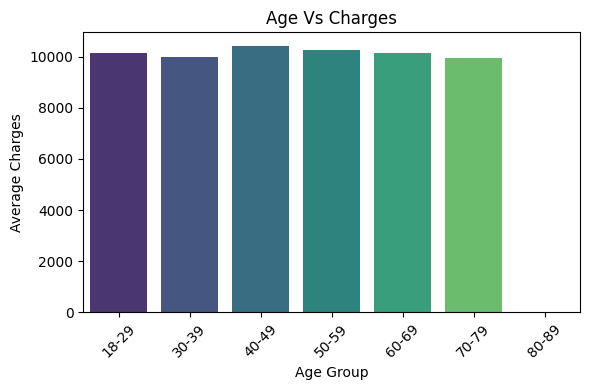

In [ ]:
bins = [18, 30, 40, 50, 60, 70, 80, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
d['Age_Group'] = pd.cut(d['Age'], bins=bins, labels=labels, right=False)
age_charges_avg = d.groupby('Age_Group')['Charges'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=age_charges_avg, x='Age_Group', y='Charges', palette='viridis')
plt.title('Age Vs Charges')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*Insights*

*   The graph shows a trend where the average charges decrease as the age group increases.
*   The highest average charges are associated with the age group 40-49, and the lowest are with the age group 70-79.

Text(0.5, 1.0, 'Sex vs Charges')

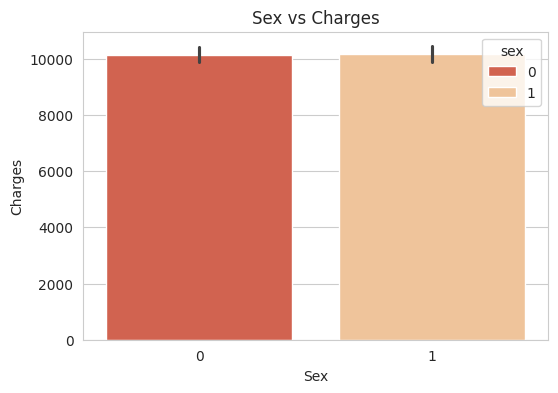

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='Charges', data=df, palette='OrRd_r', hue='sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Sex vs Charges')

*Insights*

*   The chart is a comparison of charges between two categories labeled as ‘0’(Female) and ‘1’(Male), possibly representing different sexes.  .
*   Both categories have significant charges, but category ‘0’(Female) has slightly more charges than category ‘1’(Male).
*   This suggests that there is a difference in charges between these two categories

Text(0.5, 1.0, 'BMI VS Charges')

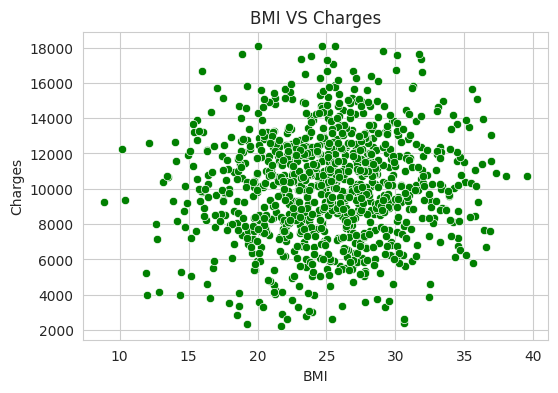

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.scatterplot(x='BMI',y='Charges',data=df,color='green')
plt.title('BMI VS Charges')

*Insights*

*   The graph shows a relationship between BMI (Body Mass Index) and Charges, possibly medical charges or insurance premiums.
*  The x-axis represents BMI, ranging approximately from 15 to 40, and the y-axis represents Charges, ranging approximately from 0 to 18000.
*   There seems to be a concentration of data points between BMI values of around 20 to 30 and Charges ranging from about 0 to 16000.
*   This suggests that while BMI may have some influence on charges.

Text(0.5, 1.0, 'Region vs Charges')

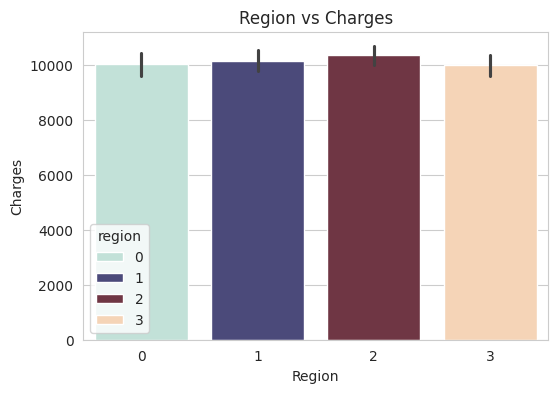

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x='region', y='Charges', data=df, palette='icefire', hue='region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs Charges')

*Insights*

*   The graph shows a comparison of ‘Charges’ across four different ‘Regions’ labeled as 0(East), 1(North), 2(South), and 3(West). Each region is represented by a different color bar.
*   Region 2(Southth) has the highest charge distribution, as its bar reaches closest to the top of the y-axis.
*  Each bar has an error bar on top, suggesting variation in the data or confidence intervals for each region.

Text(0.5, 1.0, 'Exercise Frequency vs Charges')

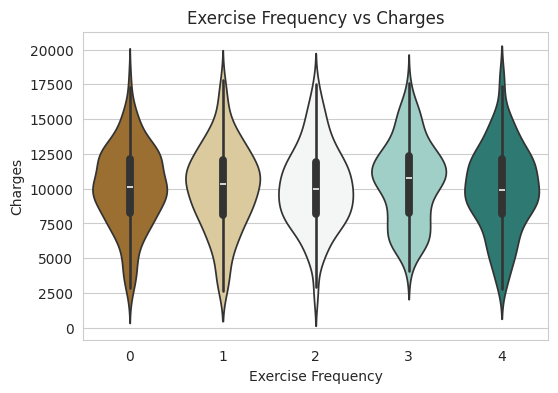

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.violinplot(x='exercise_Frequency', y='Charges', data=df, palette='BrBG')
plt.xlabel('Exercise Frequency')
plt.ylabel('Charges')
plt.title('Exercise Frequency vs Charges')

*Insights*

*   The graph shows five different levels of exercise frequency, from 0 to 4(2 times/week,Daily,3 times/week,Once a week,Rarely).
*   Each level of exercise frequency has a different distribution of charges. The width of each violin plot indicates the density of data points at different charge levels.
* The median charge appears to increase with higher exercise frequency levels.
* The spread of charges (as indicated by the IQR) varies across different exercise frequencies.
* Exercise frequency level 0(2 times/week) seems to have the widest distribution of charges.   





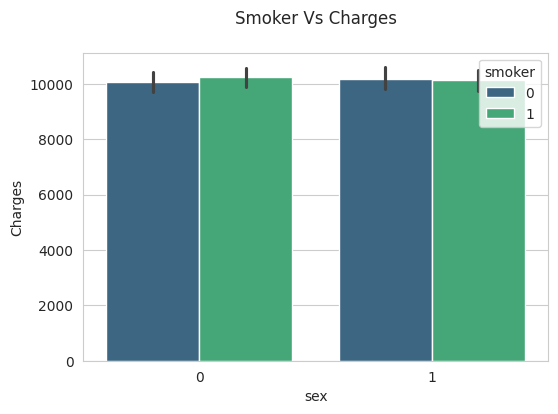

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='Charges', data=df, palette='viridis', hue='smoker')
plt.title('Smoker Vs Charges\n')
plt.show()

*Insights*

*   The chart compares charges between smokers(1) and non-smokers(0) of Male(1) and Female(0) .
*  Charges for smokers (green bars) are consistently higher than for non-smokers (blue bars) across both categories.

Text(0.5, 1.0, 'Mental Health Status VS Charges')

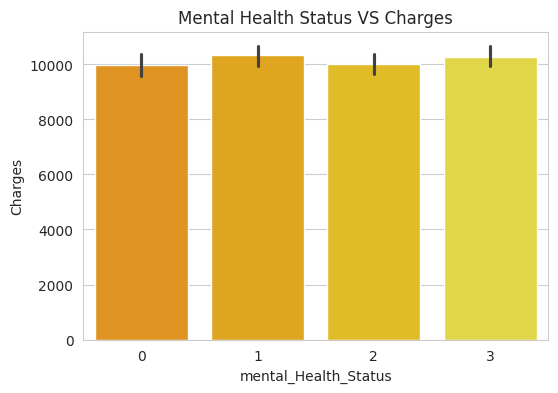

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x='mental_Health_Status', y='Charges', data=df, palette='Wistia_r')
plt.title('Mental Health Status VS Charges')

*Insights*

*  The chart compares charges across different categories of mental health status.
*  The x-axis represents mental health status categories labeled as 0(Excellent),1(Fair),2(Poor), and 3(Good).
*  The y-axis represents charges and ranges from 0 to 10,000.  
*   1(Fair) has the highest charge distribution.

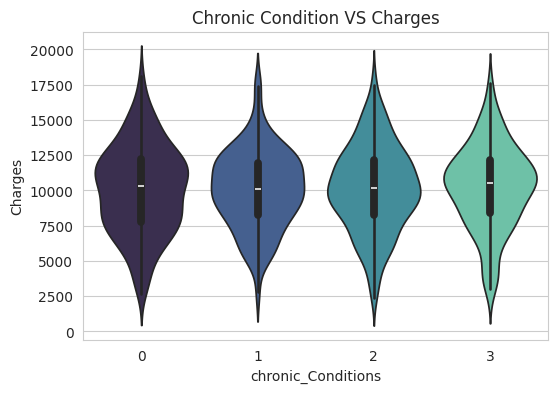

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.violinplot(x='chronic_Conditions', y='Charges', data=df, palette='mako')
plt.title('Chronic Condition VS Charges')
plt.show()

*Insights*

*  There are four violin plots, each corresponding to a different number of chronic conditions 0 (Arthritis),1(Diabets),2(Heart Disease),3(High Blood Pressure).
*  Patients with more chronic conditions generally have higher charges.
*   0(Arthritis) has the highest charge distribution.

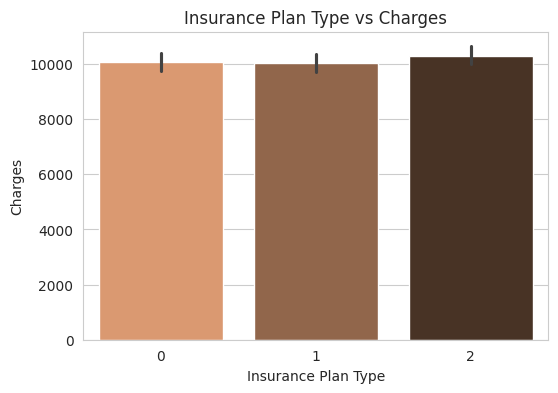

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='insurance_Plan_Type', y='Charges', palette='copper_r')
plt.xlabel('Insurance Plan Type')
plt.ylabel('Charges')
plt.title('Insurance Plan Type vs Charges')
plt.show()

*Insights*

*  The chart compares charges  across three different types of insurance plans such as 0(HDHP),1(HMO),2(PPO).
*  Type 0 and Type 1: Follows closely in terms of charges.
*  Plan Type 2: Has the highest charges.

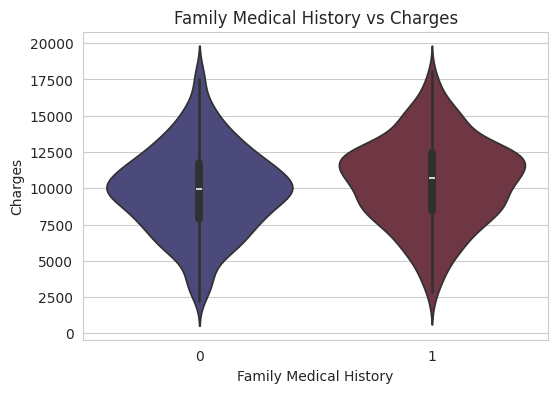

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='family_Medical_History', y='Charges', palette='icefire')
plt.xlabel('Family Medical History')
plt.ylabel('Charges')
plt.title('Family Medical History vs Charges')
plt.show()

*Insights*

*   The x-axis represents the Family Medical History with two categories: ‘0’ and ‘1’. ‘0’ likely indicates no family history, and ‘1’ indicates a presence of family medical history.
*  The y-axis represents “Charges” and ranges from 0 to 20,000 in increments of 2,500.
*  The spread of the blue plot (category ‘0’) appears narrower than that of the red plot (category ‘1’).
*   This could indicate that individuals with a family medical history might have higher medical expenses.  



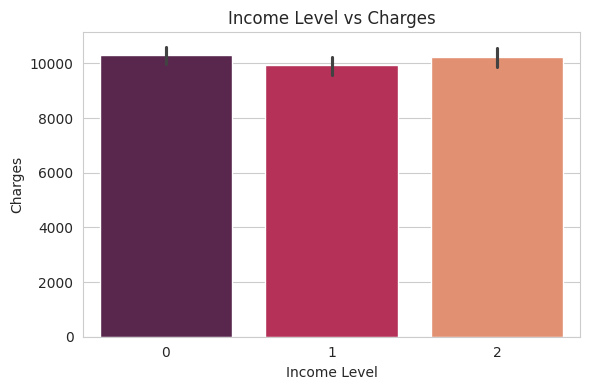

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='income_Level', y='Charges', palette='rocket')
plt.xlabel('Income Level')
plt.ylabel('Charges')
plt.title('Income Level vs Charges')
plt.tight_layout()
plt.show()

*Insights*

*   The graph represents three different income levels categorized as 0(High), 1(Low), and 2(Medium) on the x axis.
* The y axis represents charges with increments of 2000 up to 10000.
*  0(High) has the highest charge distribution.  

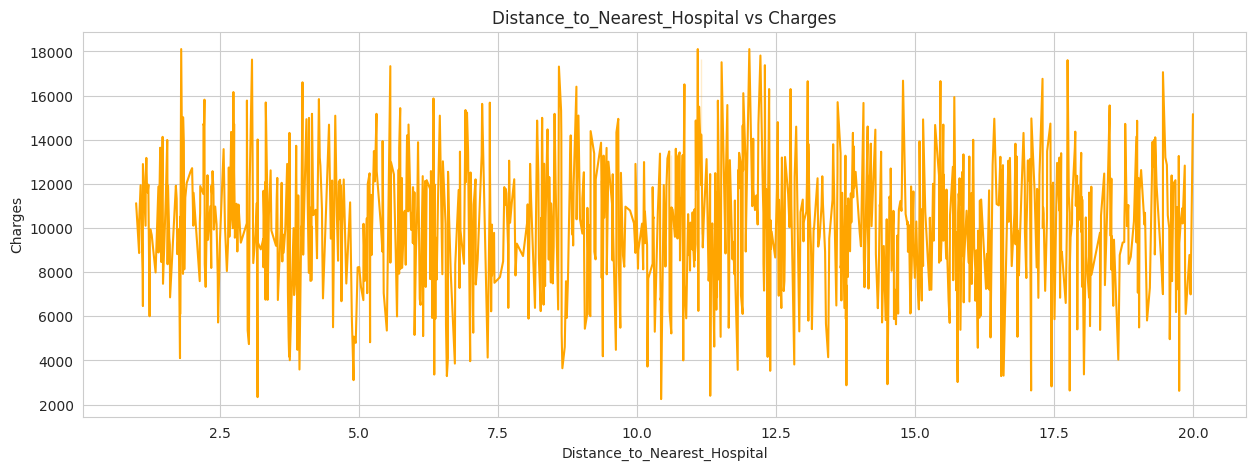

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Distance_to_Nearest_Hospital', y='Charges', color='orange')
plt.xlabel('Distance_to_Nearest_Hospital')
plt.ylabel('Charges')
plt.title('Distance_to_Nearest_Hospital vs Charges')
plt.show()

*Insights*

*    There are numerous data points plotted on the graph, each representing an individual charge amount at various distances from a hospital.
*  The data points are densely packed and show a wide distribution of charges at all distances.
*  This could suggest that the charges being compared are not significantly influenced by the distance to the nearest hospital.

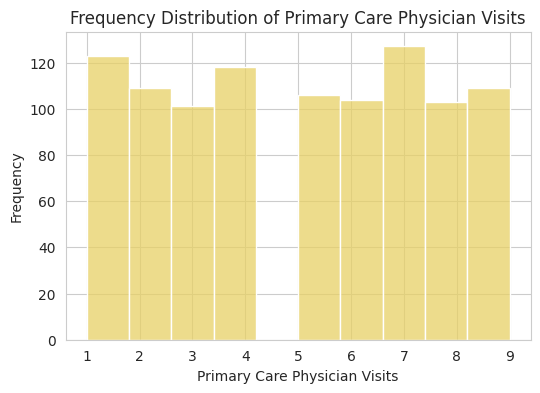

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Primary_Care_Physician_Visits', bins=10, kde=False, color='#E8D166')
plt.title('Frequency Distribution of Primary Care Physician Visits')
plt.xlabel('Primary Care Physician Visits')
plt.ylabel('Frequency')
plt.show()

*Insights*

*   The horizontal axis (x-axis) is labeled “Primary Care Physician Visits” and ranges from 1 to 9.
*  The vertical axis (y-axis) represents the frequency of visits.
*   The highest frequency appears to be around 1,4 and 7 visits, as indicated by the tallest bar.
*  There is a gradual decline in frequency as the number of visits increases.
*   The lowest frequency seems to be for 3 visits.

#Step 3:- Feature Engineering

*Insights*

*   Create new features that might provide valuable information for modeling.
*   Transform existing features to make them more suitable for modeling.
*   Encode categorical variables if needed (e.g. label encoding).
*   We don't need to execute label encoding again because we completed it at the data preprocessing stage.  
*   The dataset's target and feature variables must be chosen.












##Selection of Feature And Target Variable

In [ ]:
# Selecting Independent (Features) & Dependent(Target) variables
features=df[['Age','sex','BMI','smoker','region','exercise_Frequency','chronic_Conditions','insurance_Plan_Type','Distance_to_Nearest_Hospital','income_Level','family_Medical_History','Primary_Care_Physician_Visits','mental_Health_Status']]
target=df['Charges']



*   The first line selects specific columns from the DataFrame df stores it in the variable 'features'
*   df['Charges'] accesses the 'Charges' column of the DataFrame df and stores it in the variable 'target'


# Step 4:- Data Splitting


*Insights*

*    Split the dataset into training and testing sets to evaluate model
performance with a ration of 80-20.




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)
print("Training set (X):", X_train.shape)
print("Testing set (X):", X_test.shape)
print("Training set (y):", y_train.shape)
print("Testing set (y):", y_test.shape)

Training set (X): (800, 13)
Testing set (X): (200, 13)
Training set (y): (800,)
Testing set (y): (200,)


*Insights*

*    We can split the data into training and testing sets using the train_test_split function from the scikit-learn library.
*   "test_size=0.2" specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.
*   "random_state" is used to ensure reproducibility. Setting it to a fixed value (e.g., 42) ensures that the data split is the same every time you run the code.
*   X_train and y_train will contain the features and target variable for the training set.
*   X_test and y_test will contain the features and target variable for the testing set.
  







##**Scaling**


*   Data standardisation is required following data splitting.
*   StandardScaler() is used in this instance to do standardisation.



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))
print("Scaled Training set (X):", X_train_scaled.shape)
print("Scaled Testing set (X):", X_test_scaled.shape)
print("Scaled Training set (y):", y_train_scaled.shape)
print("Scaled Testing set (y):", y_test_scaled.shape)


Scaled Training set (X): (800, 13)
Scaled Testing set (X): (200, 13)
Scaled Training set (y): (800, 1)
Scaled Testing set (y): (200, 1)



*   We create a StandardScaler object.
*   We fit the scaler on the training features (X_train) and then transform both training and testing features using the fitted scaler.
*   Similarly, we fit and transform the target variable (y_train and y_test).
*   Note that when working with the target variable, we reshape it to (-1, 1) to ensure that it is in the correct format for the scaler.
*   Finally, we print the shapes of the scaled training and testing sets for verification.

#Step 5:- Model Selection

## Machine Learning


*   Machine learning is a subset of AI, which uses algorithms that learn from data to make predictions.
*   These predictions can be generated through supervised learning, where algorithms learn patterns from existing data, or unsupervised learning, where they discover general patterns in data.
*   From the problem statement we got that we have to predict the medical insurance cost for patients.
*   In machine learning, regression is used for predictions.
*   The regression models used:
>
              - Linear Regression
              - Decision Tree
              - Random Forest
              - Support Vector Machine(SVM)
              - Gradient Boosting
              - XGBoost


#Step 6:- Model Training

##1. Linear regression


*  Linear regression is a fundamental supervised machine learning algorithm used for predicting numerical values based on input features.  
* It assumes a linear relationship between the features and the target variable.
* The model learns the coefficients that best fit the data and can make predictions for new inputs.

Mean Squared Error (MSE): 10103752.238276944
Mean Absolute Error (MAE): 2552.562576786943
Root Mean Squared Error (RMSE): 3178.6399982188836
R-squared Score: -0.025841336360235223


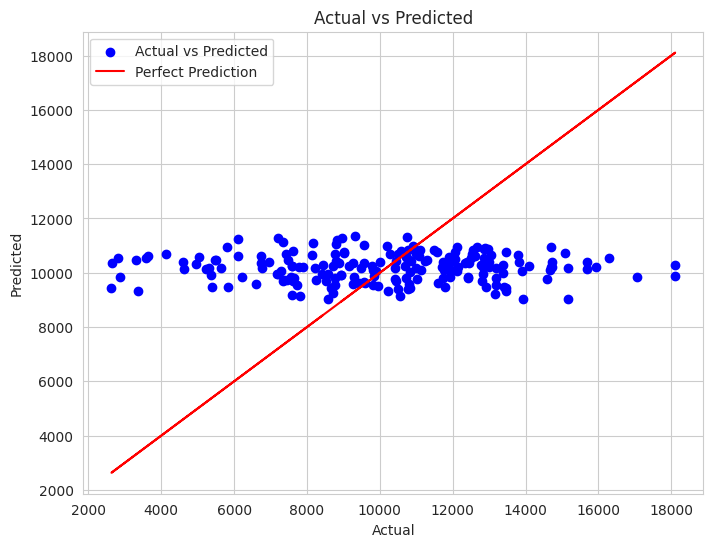

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



* We instantiate a LinearRegression model.  
* We fit the model on the scaled training data (X_train_scaled and y_train_scaled).  
* We predict on the scaled testing data (X_test_scaled).
* We inverse transform the scaled predictions to get them back to the original scale using y_scaler.inverse_transform.  
* We compute the evaluation metrics: MSE, MAE, RMSE, and R-squared score.   
* Finally, we create a scatter plot comparing the actual vs predicted values.
* The red line represents a perfect prediction.  

##2. Decision Tree


*  Decision trees are a popular  supervised machine learning algorithm that can be used for both regression and classification tasks.
*  In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node.
*  The decisions or the test are performed on the basis of features of the given dataset.
*  It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.



Decision Tree Model:
Mean Squared Error (MSE): 19764583.675914537
Mean Absolute Error (MAE): 3413.587475
Root Mean Squared Error (RMSE): 4445.737697605937
R-squared Score: -1.0067126006804714


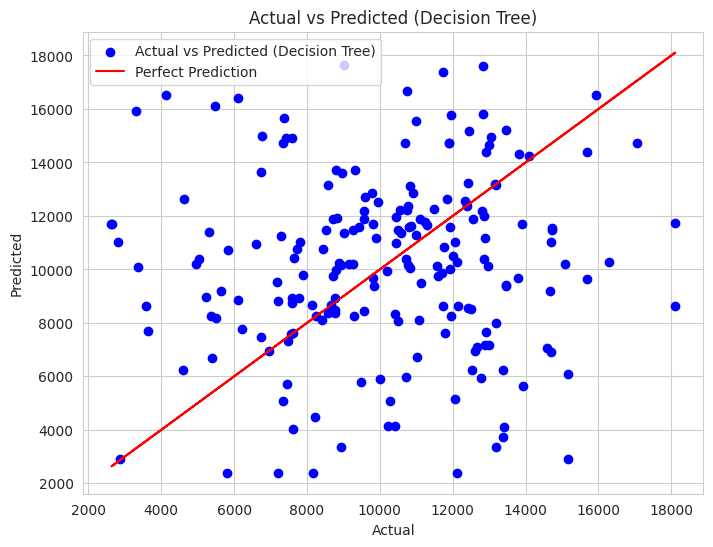

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train_scaled)
y_pred_tree_scaled = tree_model.predict(X_test_scaled)
y_pred_tree = y_scaler.inverse_transform(y_pred_tree_scaled.reshape(-1, 1))
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree Model:")
print("Mean Squared Error (MSE):", mse_tree)
print("Mean Absolute Error (MAE):", mae_tree)
print("Root Mean Squared Error (RMSE):", rmse_tree)
print("R-squared Score:", r2_tree)

# Scatter plot of actual vs predicted values for Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, color='blue', label='Actual vs Predicted (Decision Tree)')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted (Decision Tree)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



*   We instantiate a DecisionTreeRegressor.
*   We fit the model on the scaled training data (X_train_scaled and y_train_scaled).
*  We predict on the scaled testing data (X_test_scaled).
*  We inverse transform the scaled predictions to get them back to the original scale using y_scaler.inverse_transform.
*   We compute the evaluation metrics: MSE, MAE, RMSE, and R-squared score for the Decision Tree model.
*   Finally, we create a scatter plot comparing the actual vs predicted values for the Decision Tree model.


##3. Random Forest


*   Random forest regression is a supervised learning algorithm and bagging technique that uses an ensemble learning method for regression in machine learning.
*  The trees in random forests run in parallel, meaning there is no interaction between these trees while building the trees.

Random Forest Model:
Mean Squared Error (MSE): 9685564.4773554
Mean Absolute Error (MAE): 2479.572005025
Root Mean Squared Error (RMSE): 3112.1639541250715
R-squared Score: 0.01661757211220871


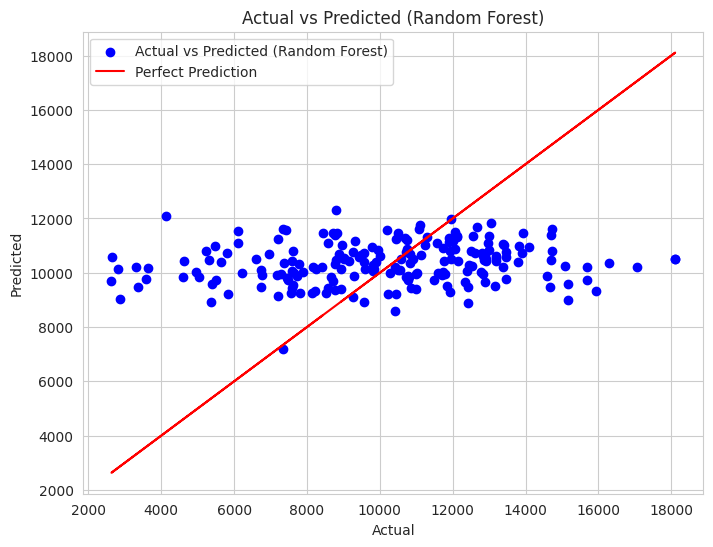

In [ ]:
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_forest_scaled = forest_model.predict(X_test_scaled)
y_pred_forest = y_scaler.inverse_transform(y_pred_forest_scaled.reshape(-1, 1))
mse_forest = mean_squared_error(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest Model:")
print("Mean Squared Error (MSE):", mse_forest)
print("Mean Absolute Error (MAE):", mae_forest)
print("Root Mean Squared Error (RMSE):", rmse_forest)
print("R-squared Score:", r2_forest)

# Scatter plot of actual vs predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_forest, color='blue', label='Actual vs Predicted (Random Forest)')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



*  We instantiate a RandomForestRegressor.
*  We fit the model on the scaled training data (X_train_scaled and y_train_scaled).
*  We predict on the scaled testing data (X_test_scaled).
*  We inverse transform the scaled predictions to get them back to the original scale using y_scaler.inverse_transform
*  We compute the evaluation metrics: MSE, MAE, RMSE, and R-squared score for the Random Forest model.
* Finally, we create a scatter plot comparing the actual vs predicted values for the Random Forest model.

##4. Support Vector Machine(SVM)


*  Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.
*   SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes
*  SVM chooses the extreme points/vectors that help in creating the hyperplane.

Support Vector Machine (SVM) Model:
Mean Squared Error (MSE): 9936464.537694465
Mean Absolute Error (MAE): 2500.84800575886
Root Mean Squared Error (RMSE): 3152.215813946511
R-squared Score: -0.00885649406847433


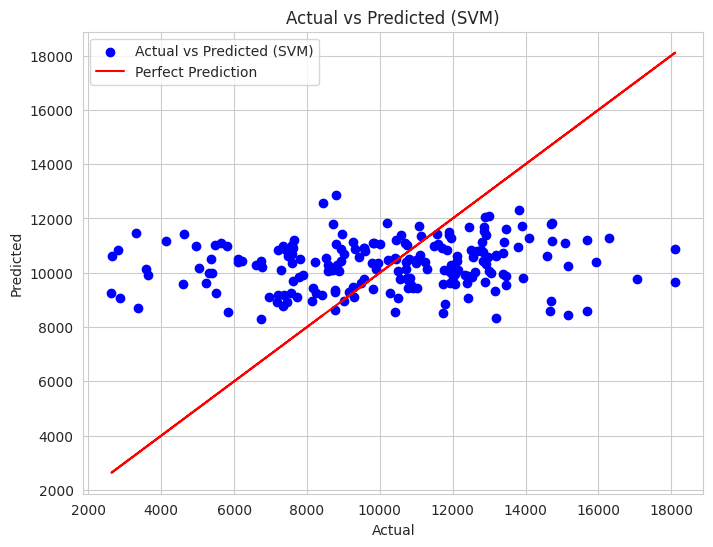

In [ ]:
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_svm_scaled = svm_model.predict(X_test_scaled)
y_pred_svm = y_scaler.inverse_transform(y_pred_svm_scaled.reshape(-1, 1))
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)
r2_svm = r2_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Model:")
print("Mean Squared Error (MSE):", mse_svm)
print("Mean Absolute Error (MAE):", mae_svm)
print("Root Mean Squared Error (RMSE):", rmse_svm)
print("R-squared Score:", r2_svm)

# Scatter plot of actual vs predicted values for SVM
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svm, color='blue', label='Actual vs Predicted (SVM)')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted (SVM)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



*   We instantiate an SVM regressor (SVR).
*   We fit the model on the scaled training data (X_train_scaled and y_train_scaled).
*   We predict on the scaled testing data (X_test_scaled).
*   We inverse transform the scaled predictions to get them back to the original scale using y_scaler.inverse_transform.
*   We compute the evaluation metrics: MSE, MAE, RMSE, and R-squared score for the SVM model.
*   Finally, we create a scatter plot comparing the actual vs predicted values for the SVM model.

##5. Gradient Boosting


*   Gradient Boosting Machine (GBM) is considered one of the most powerful boosting algorithms.
*   Boosting is one of the popular learning ensemble modeling techniques used to build strong classifiers from various weak classifiers.
*  It builds a better model by merging earlier models until the best model reduces the total prediction error.

Gradient Boosting Model:
Mean Squared Error (MSE): 10375317.801921062
Mean Absolute Error (MAE): 2545.4473678909517
Root Mean Squared Error (RMSE): 3221.074013729126
R-squared Score: -0.05341358616884784


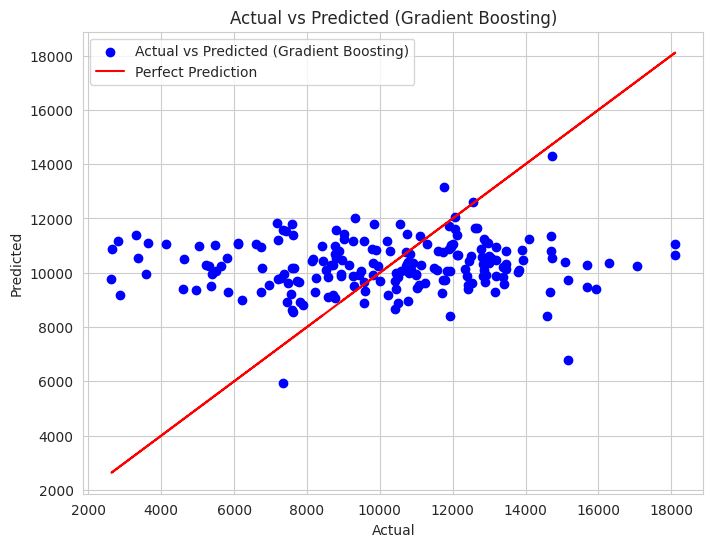

In [ ]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_gb_scaled = gb_model.predict(X_test_scaled)
y_pred_gb = y_scaler.inverse_transform(y_pred_gb_scaled.reshape(-1, 1))
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Model:")
print("Mean Squared Error (MSE):", mse_gb)
print("Mean Absolute Error (MAE):", mae_gb)
print("Root Mean Squared Error (RMSE):", rmse_gb)
print("R-squared Score:", r2_gb)

# Scatter plot of actual vs predicted values for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='blue', label='Actual vs Predicted (Gradient Boosting)')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted (Gradient Boosting)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



*  We instantiate a Gradient Boosting Regressor (GradientBoostingRegressor).
*  We fit the model on the scaled training data (X_train_scaled and y_train_scaled).
*  We predict on the scaled testing data (X_test_scaled).
*  We inverse transform the scaled predictions to get them back to the original scale using y_scaler.inverse_transform.
*  We compute the evaluation metrics: MSE, MAE, RMSE, and R-squared score for the Gradient Boosting model.
*  Finally, we create a scatter plot comparing the actual vs predicted values for the Gradient Boosting model.



##6. XGBoost



*   XGBoost, or eXtreme Gradient Boosting, is a machine learning algorithm under ensemble learning.  
*   It is trendy for supervised learning tasks, such as regression and classification.
*   XGBoost builds a predictive model by combining the predictions of multiple individual models, often decision trees, in an iterative manner.
*  XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models.
*  It is widely used machine learning algorithms due to its ability to handle large datasets.

XGBoost Model:
Mean Squared Error (MSE): 11035183.224873118
Mean Absolute Error (MAE): 2559.3607004492187
Root Mean Squared Error (RMSE): 3321.924626609267
R-squared Score: -0.12041020399312741


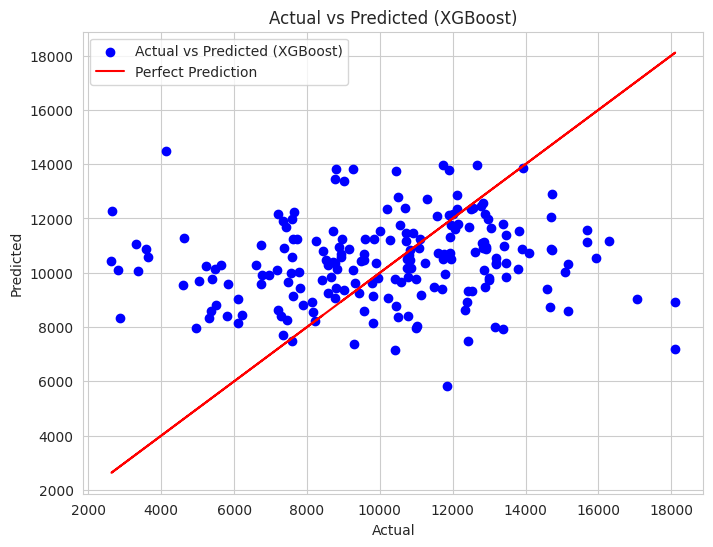

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_xgb_scaled = xgb_model.predict(X_test_scaled)
y_pred_xgb = y_scaler.inverse_transform(y_pred_xgb_scaled.reshape(-1, 1))
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Model:")
print("Mean Squared Error (MSE):", mse_xgb)
print("Mean Absolute Error (MAE):", mae_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("R-squared Score:", r2_xgb)

# Scatter plot of actual vs predicted values for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='Actual vs Predicted (XGBoost)')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted (XGBoost)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()



*  We instantiate an XGBoost regressor (xgb.XGBRegressor).
*   We fit the model on the scaled training data (X_train_scaled and y_train_scaled).
*  We predict on the scaled testing data (X_test_scaled).
*  We inverse transform the scaled predictions to get them back to the original scale using y_scaler.inverse_transform.
*  We compute the evaluation metrics: MSE, MAE, RMSE, and R-squared score for the XGBoost model.
*  Finally, we create a scatter plot comparing the actual vs predicted values for the XGBoost model.

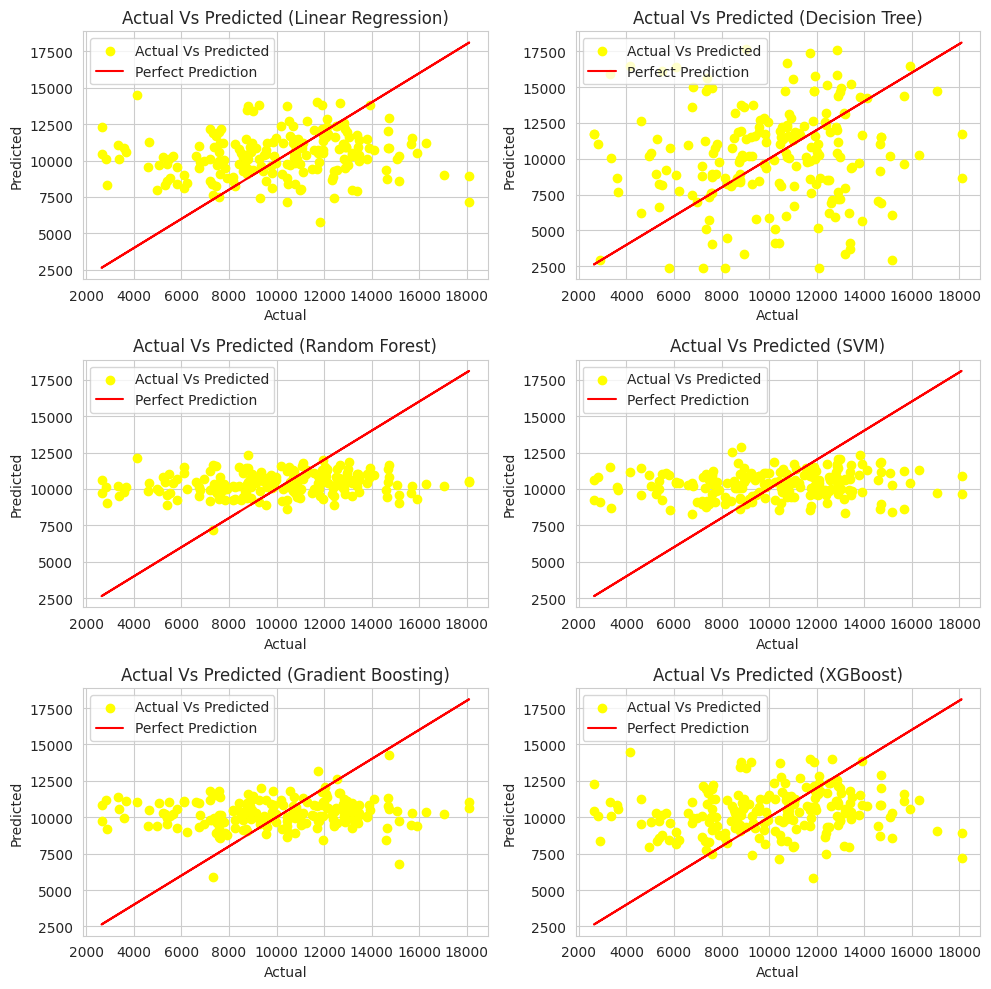

In [ ]:
models=[
    ('Linear Regression',y_pred),
    ('Decision Tree',y_pred_tree),
    ('Random Forest',y_pred_forest),
    ('SVM',y_pred_svm),
    ('Gradient Boosting',y_pred_gb),
    ('XGBoost',y_pred_xgb)
]
fig,axes=plt.subplots(3,2,figsize=(10,10))
axes=axes.flatten()
for i,(model_name,y_pred_model) in enumerate(models):
  ax=axes[i]
  ax.scatter(y_test,y_pred_model,color='yellow',label='Actual Vs Predicted')
  ax.plot(y_test,y_test,color='red',label='Perfect Prediction')
  ax.set_title(f'Actual Vs Predicted ({model_name})')
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  ax.legend()
plt.tight_layout()
plt.show()



*  Each model (e.g., Linear Regression, Decision Tree, etc.) has been trained and used to predict target values** (y_pred, y_pred_tree, etc.)**.
* It creates a subplot grid of 3 rows and 2 columns** (plt.subplots(3,2,figsize=(10,10)))**, which means there will be 6 plots arranged in this grid.
* It iterates over each model and its corresponding predicted values using a for loop.  
*  Inside the loop, it plots the actual versus predicted values on one of the subplots.  
*  For each model, it creates a scatter plot where the x-axis represents the actual values **(y_test)** and the y-axis represents the predicted values **(y_pred_model)**.
*  It adds a red line on each plot, indicating perfect predictions where the actual values equal the predicted values.   



#Step 7:- Model Evaluation

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Support Vector Machine', SVR(kernel='linear')),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor())
]
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse,r2])
r = pd.DataFrame(results, columns=['Model', 'MSE', 'R-squared'])
print("Model Comparison:")
r

Model Comparison:


,Model,MSE,R-squared
0,Linear Regression,1.010375e+07,-0.025841
1,Decision Tree,2.060604e+07,-1.092146
2,Random Forest,9.851178e+06,-0.000197
3,Support Vector Machine,1.001019e+07,-0.016342
4,Gradient Boosting,1.041310e+07,-0.057250
5,XGBoost,1.103791e+07,-0.120687




*  A list named models is created, containing the name of the regression model, and instance of regression model itself.
*  A loop iterates over each tuple in the models list.
*   The results are stored in a DataFrame named r with columns 'Model', 'MSE', and 'R-squared'.
* The DataFrame is printed to display a comparison of the performance of different regression models in terms of their MSE and R-squared score.  
*   The comparison allows us to understand which regression model performs better on the given dataset in terms of predicting the target variable.
  

## Choosing Best model

In [ ]:
best_mse = r['MSE'].idxmin()
best_r2 = r['R-squared'].idxmax()
best_model = r.loc[[best_mse, best_r2]].iloc[0]
print("\nBest performing models based on Model Evaluation:")
best_model


Best performing models based on Model Evaluation:


Model         Random Forest
MSE          9851178.216847
R-squared         -0.000197
Name: 2, dtype: object



*  The code finds the index of the row with the minimum MSE (best_mse) and the index of the row with the maximum R-squared (best_r2) from the DataFrame r.
*  Using the indices found in the previous step, the code retrieves the information of the best-performing model from the DataFrame r and stores it in best_model.
*  The iloc function is used to locate the row with the specified indices.
*  Finally, the code prints the information of the best-performing model based on both MSE and R-squared score.

#Step 8:- Model Deployment

##Model Re-training:-

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_combined = np.concatenate((X_train, X_test))
y_combined = np.concatenate((y_train, y_test))
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_combined, y_combined)

RandomForestRegressor(random_state=42)


*   The code essentially prepares data by combining training and testing sets.  
*   Then constructs and trains a Random Forest regression model on the combined data.
*   This allows the model to learn patterns from the entire dataset, and potentially improve its predictive performance.  

##Save the trained Model:-

In [ ]:
import joblib
model = 'random_forest_model.pkl'
joblib.dump(random_forest_model, model)
print("Random Forest model saved successfully to:", model)

Random Forest model saved successfully to: random_forest_model.pkl



*   This code ensures that the trained Random Forest regression model is saved to a file for later use or deployment.

##Predict charges for new customer:-

In [ ]:
data={'Age':38,
      'sex':0,
      'BMI':38.21,
      'smoker':0,
      'region':3,
      'exercise_Frequency':2,
      'chronic_Conditions':1,
      'insurance_Plan_Type':2,
      'Distance_to_Nearest_Hospital':13.25,
      'income_Level':0,
      'family_Medical_History':1,
      'Primary_Care_Physician_Visits':6,
      'mental_Health_Status':3}

dfs=pd.DataFrame(data,index=[0])
dfs

,Age,sex,BMI,smoker,region,exercise_Frequency,chronic_Conditions,insurance_Plan_Type,Distance_to_Nearest_Hospital,income_Level,family_Medical_History,Primary_Care_Physician_Visits,mental_Health_Status
0,38,0,38.21,0,3,2,1,2,13.25,0,1,6,3




*  Here we create a sample customre data and convert it into dataframe.

In [ ]:
model=joblib.load('random_forest_model.pkl')
model.predict(dfs)

array([11217.7106])



*   The newly created sample data is loaded into the trained model 'random_forest_model.pkl'.
*   After that the model will predict the insurace charge based on given details.

#Step 9:- Conclusion



* Provide extra resources and support for high-risk age groups, like 40-49 years, with preventive care and health education.  
*  Design healthcare programs addressing the specific needs of females who face slightly higher charges.
*  Create programs for managing BMI and promoting healthy lifestyles, including nutrition counseling and exercise programs.
*  Develop region-specific healthcare strategies to address regional health disparities and enhance healthcare infrastructure.
*  Invest in programs for managing chronic diseases, including patient education and remote monitoring technologies.
*   Educate patients about insurance plans and collaborate with providers to optimize reimbursement processes.
*   Prioritize family medical history screening during patient assessments and offer genetic counseling services.
*    Ensure healthcare services are accessible to all income levels, possibly through sliding scale fee structures or financial assistance programs.
*  Strengthen primary care coordination to optimize healthcare utilization and prevent unnecessary hospitalizations.
*  Continuously monitor healthcare data to inform strategic decisions and tailor interventions.
